This notebook will illustrate the difference between a normal distribution and another distribution that is skewed and for which some variable transformations will be done in order to transform it to normal.

First, let's generate data from a normal distribution

In [154]:
import numpy as np
import pandas as pd
from scipy import stats
import pylab

%matplotlib inline

normally_distributed = np.random.normal(size=10000)  # Generate normal data*

Now, we are going to check using different methods that is a normal distribution:

known Z-score: 0.0807939277186
known P-value: 0.960408116159


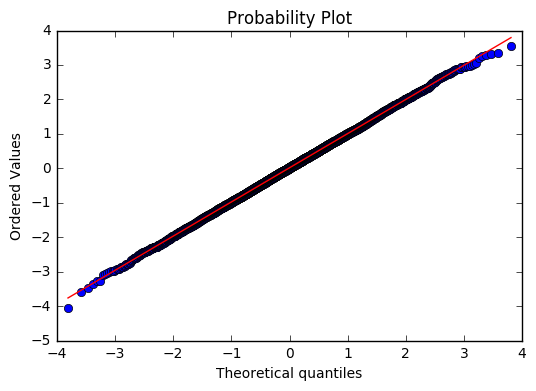

In [155]:
#checking normality of transformed values:
#normality test, should be non-significative if it is normal
out=stats.normaltest(normally_distributed)
print("known Z-score: {0}".format(out[0]))
print("known P-value: {0}".format(out[1]))

#checking normality by using a Q-Q plot. Should be a straight line if normal distribution
stats.probplot(normally_distributed, dist="norm", plot=pylab)
pylab.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1284cea10>]], dtype=object)

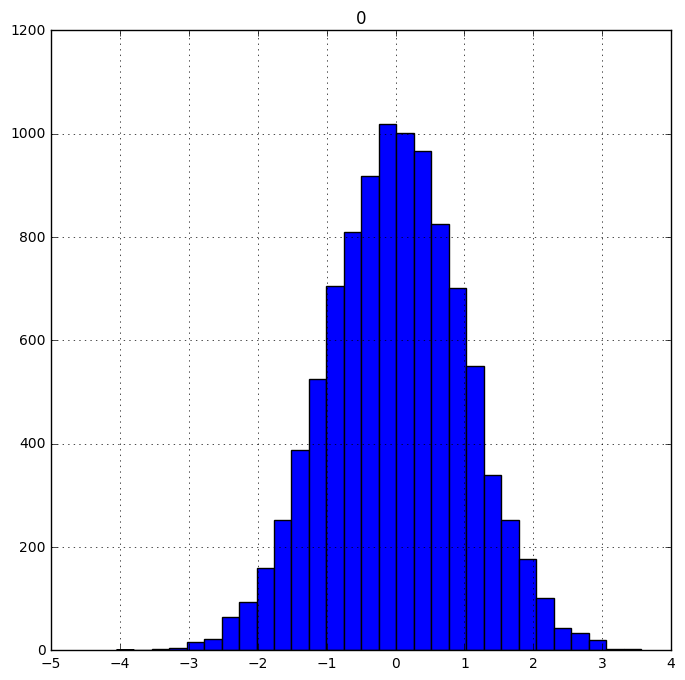

In [156]:
normally_distributed = pd.DataFrame(normally_distributed) # Convert to DF

normally_distributed.hist(figsize=(8,8),bins=30) # Plot histograms

Now, let's generate a skewed distribution

In [157]:
skewed = np.random.exponential(scale=2,size= 10000)    # Generate skewed data

Now, we are going to check using different methods that is a normal distribution:

known Z-score: 3974.86879589
known P-value: 0.0


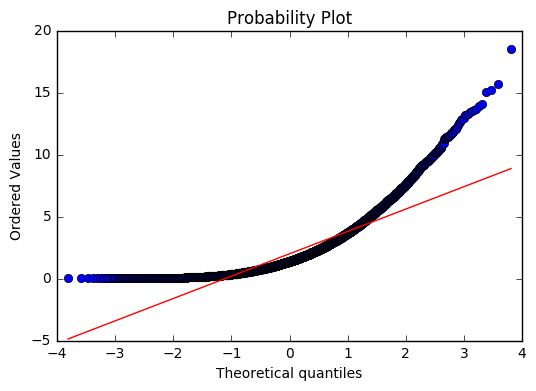

In [158]:
#checking normality of transformed values:
#normality test, should be non-significative if it is normal
out=stats.normaltest(skewed)
print("known Z-score: {0}".format(out[0]))
print("known P-value: {0}".format(out[1]))

#checking normality by using a Q-Q plot. Should be a straight line if normal distribution
stats.probplot(skewed, dist="norm", plot=pylab)
pylab.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124ee4f10>]], dtype=object)

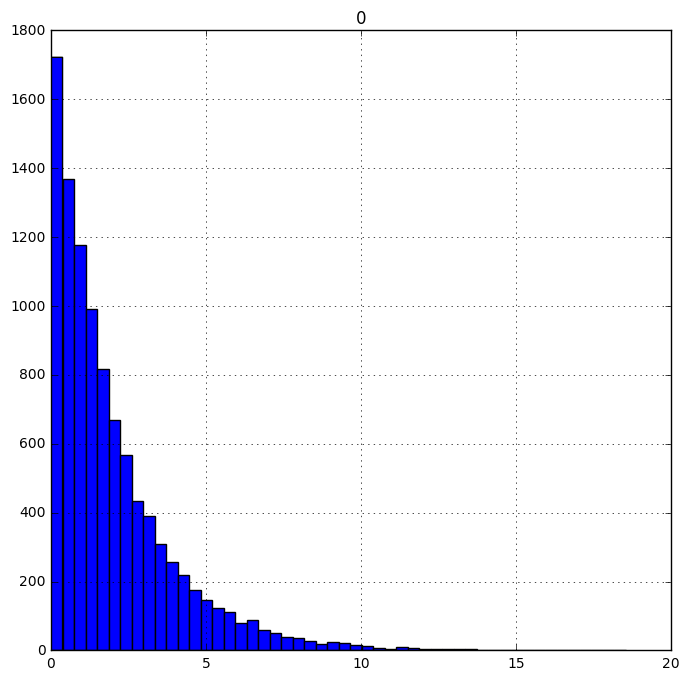

In [159]:
skewed = pd.DataFrame(skewed)   # Convert to DF

skewed.hist(figsize=(8,8),bins=50)  # Plot histogram
                      

# Square root transformation:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126fbacd0>]], dtype=object)

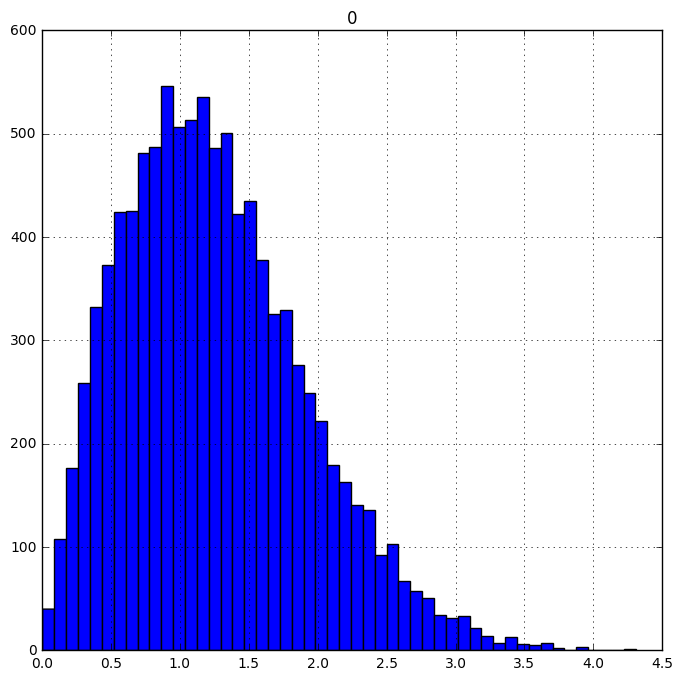

In [160]:
sqrt_transformed = skewed.apply(np.sqrt) # Get the square root of data points*

sqrt_transformed.hist(figsize=(8,8), bins=50)     # Plot histogram
     

Let's analyze the normality now:

known Z-score: [ 580.27630909]
known P-value: [  9.87644138e-127]


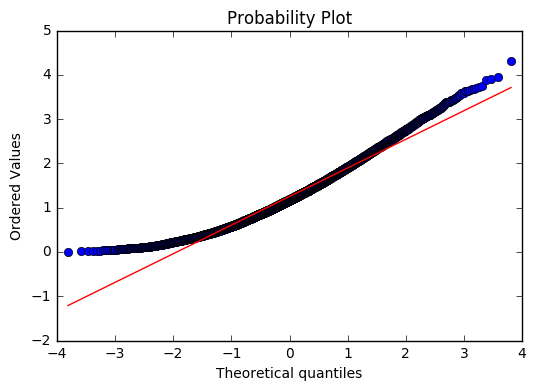

In [161]:
out=stats.normaltest(sqrt_transformed)
print("known Z-score: {0}".format(out[0]))
print("known P-value: {0}".format(out[1]))

#checking normality by using a Q-Q plot. Should be a straight line if normal distribution
stats.probplot(sqrt_transformed[0], dist="norm", plot=pylab)
pylab.show()

# Log transformation

In [162]:
log_transformed = (skewed+1).apply(np.log)   # Get the log of the data

We need to add + 1 in order for not having negative values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125594790>]], dtype=object)

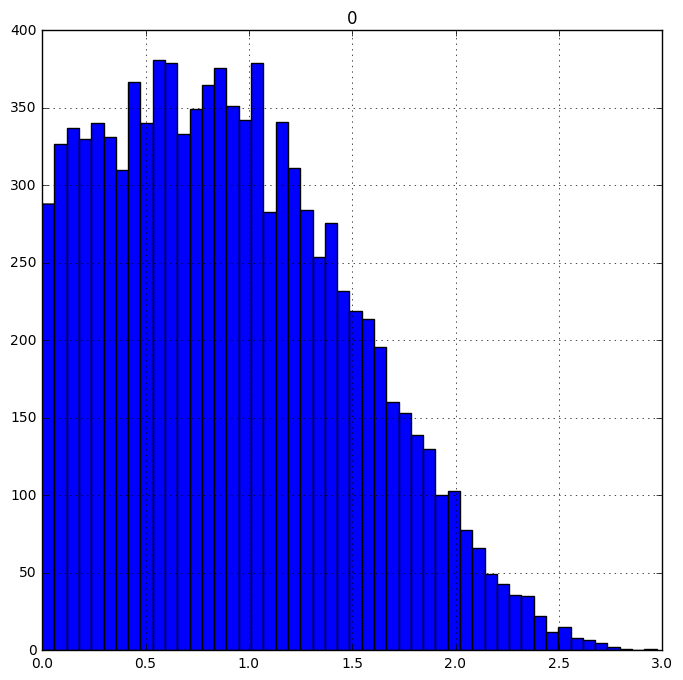

In [163]:
log_transformed.hist(figsize = (8,8),bins=50)          # Plot histogram
                                  

Let's analyze the normality now:

known Z-score: [ 482.07590637]
known P-value: [  2.08231776e-105]


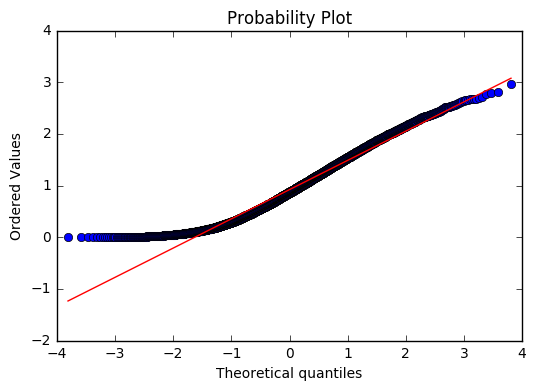

In [164]:
out=stats.normaltest(log_transformed)
print("known Z-score: {0}".format(out[0]))
print("known P-value: {0}".format(out[1]))

#checking normality by using a Q-Q plot. Should be a straight line if normal distribution
stats.probplot(log_transformed[0], dist="norm", plot=pylab)
pylab.show()

# Transformation with boxcox

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12277a410>]], dtype=object)

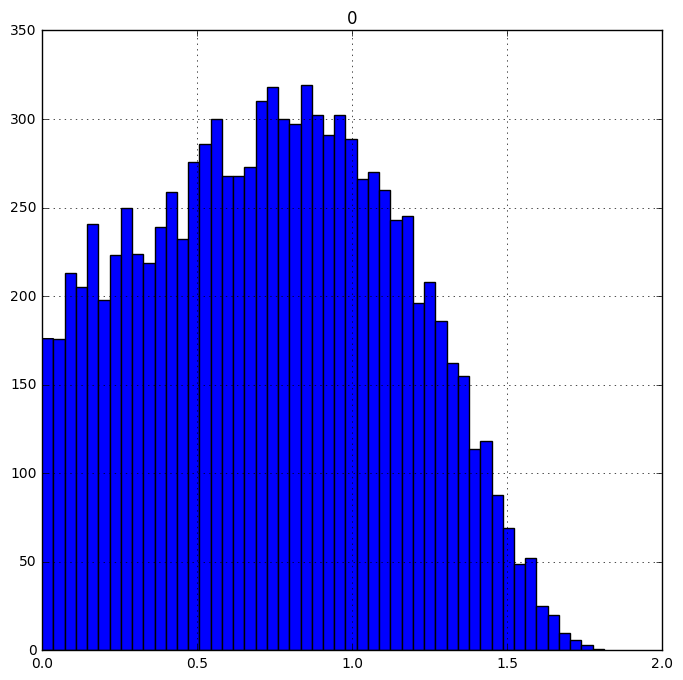

In [165]:
boxcox_transformed=skewed+1
boxcox_transformed[0] = stats.boxcox(boxcox_transformed[0])[0]

boxcox_transformed.hist(figsize = (8,8),bins=50)

Let's analyze the normality now:

known Z-score: [ 1284.51697884]
known P-value: [  1.17674426e-279]


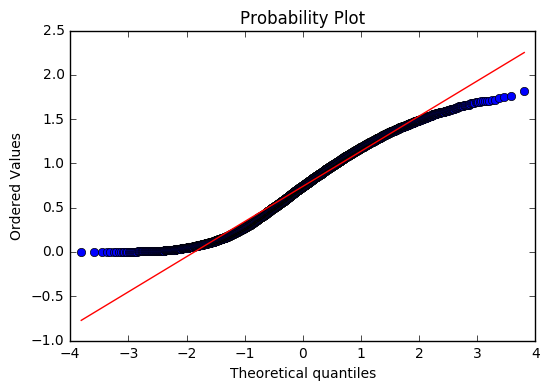

In [166]:
out=stats.normaltest(boxcox_transformed)
print("known Z-score: {0}".format(out[0]))
print("known P-value: {0}".format(out[1]))

#checking normality by using a Q-Q plot. Should be a straight line if normal distribution
stats.probplot(boxcox_transformed[0], dist="norm", plot=pylab)
pylab.show()